# Importando Bibliotecas

In [1]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
df = pd.read_csv('DelayedFlights.zip')
df 

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Mostrar todas as colunas

In [4]:
pd.set_option('display.max_columns', 30)
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


O que representa cada coluna:

**Year:** O ano da data do voo.

**Month:** O mês da data do voo.

**DayofMonth:** O dia do mês da data do voo.

**DayOfWeek:** O dia da semana da data do voo (1 para segunda-feira, 2 para terça-feira, e assim por diante).

**DepTime:** A hora de partida real do voo (formato HHMM).

**CRSDepTime:** A hora de partida programada do voo (formato HHMM).

**ArrTime:** A hora de chegada real do voo (formato HHMM).

**CRSArrTime:** A hora de chegada programada do voo (formato HHMM).

**UniqueCarrier:** O código do transportador aéreo.

**FlightNum:** O número do voo.

**TailNum:** O número de cauda da aeronave.

**ActualElapsedTime:** O tempo real de voo em minutos.

**CRSElapsedTime:** O tempo de voo programado em minutos.

**AirTime:** O tempo real no ar em minutos.

**ArrDelay:** O atraso na chegada em minutos.

**DepDelay:** O atraso na partida em minutos.

**Origin:** O aeroporto de origem do voo.

**Dest:** O aeroporto de destino do voo.

**Distance:** A distância percorrida em milhas.

**TaxiIn:** O tempo desde que a aeronave começa a se mover na pista até o momento em que efetivamente decola. Antes da decolagem

**TaxiOut:** O tempo desde que a aeronave toca o solo até chegar ao portão de desembarque no pouso.

**Cancelled:** Indica se o voo foi cancelado (1 para sim, 0 para não).

**CancellationCode:** O código de cancelamento, se o voo foi cancelado. Sendo A = transportadora, B = clima, C = NAS(National Airspace System), D = segurança

**Diverted:** Indica se o voo foi desviado (1 para sim, 0 para não).

**CarrierDelay:** O tempo de atraso atribuído à companhia aérea em minutos.

**WeatherDelay:** O tempo de atraso atribuído ao clima em minutos.

**NASDelay:** O tempo de atraso atribuído ao Sistema Nacional de Aviação em minutos.

**SecurityDelay:** O tempo de atraso atribuído à segurança em minutos.

**LateAircraftDelay:** O tempo de atraso atribuído à aeronave em minutos.


In [5]:
df['Year'].unique() # só ha valores de 2008

array([2008], dtype=int64)

In [6]:
# Excluindo as duas primeiras colunas
df = df.drop(df.columns[:2], axis=1)

In [7]:
# Excluindo colunas que não serão utilizadas na análise

df.drop(['TaxiIn', 'TaxiOut', 'TailNum', 'FlightNum', 'UniqueCarrier'],
                       axis=1, inplace=True)

In [8]:
df.shape

(1936758, 23)

In [9]:
df.nunique()

Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1438
CRSDepTime           1207
ArrTime              1440
CRSArrTime           1364
ActualElapsedTime     673
CRSElapsedTime        515
AirTime               650
ArrDelay             1128
DepDelay             1058
Origin                303
Dest                  304
Distance             1419
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          983
WeatherDelay          599
NASDelay              574
SecurityDelay         156
LateAircraftDelay     564
dtype: int64

Verificar a quantidade de linhas com valores nulos

In [10]:
df.isnull().sum().sort_values(ascending=False)

LateAircraftDelay    689270
SecurityDelay        689270
NASDelay             689270
WeatherDelay         689270
CarrierDelay         689270
ActualElapsedTime      8387
AirTime                8387
ArrDelay               8387
ArrTime                7110
CRSElapsedTime          198
Distance                  0
Diverted                  0
CancellationCode          0
Cancelled                 0
Month                     0
Dest                      0
Origin                    0
DayofMonth                0
CRSArrTime                0
CRSDepTime                0
DepTime                   0
DayOfWeek                 0
DepDelay                  0
dtype: int64

Voos que não sofreram atrasos são caracterizados por valores nulos nas colunas que demonstram qualquer tipo de atraso (LateAircraftDelay, SecurityDelay, NASDelay, WeatherDelay e CarrierDelay), e, consequentemente, esses valores serão substituídos por 0.

Voos cancelados são aqueles que não decolaram para o seu destino, portanto não possuem informações de partida, chegada ou atrasos (ActualElapsedTime, AirTime, ArrDelay, ArrTime, CRSElapsedTime); consequentemente, esses dados serão substituídos por 0. Já os voos desviados são aqueles que foram parcialmente cancelados, indicando que o voo não seguiu até o destino originalmente planejado. Nesse caso, métricas como tempo de voo e tempo no ar podem não ser aplicáveis, pois o voo não foi concluído conforme o planejado, e, portanto, também serão substituídas por 0.

In [11]:
df.fillna(0, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   ActualElapsedTime  float64
 8   CRSElapsedTime     float64
 9   AirTime            float64
 10  ArrDelay           float64
 11  DepDelay           float64
 12  Origin             object 
 13  Dest               object 
 14  Distance           int64  
 15  Cancelled          int64  
 16  CancellationCode   object 
 17  Diverted           int64  
 18  CarrierDelay       float64
 19  WeatherDelay       float64
 20  NASDelay           float64
 21  SecurityDelay      float64
 22  LateAircraftDelay  float64
dtypes: float64(12), int64(8), object(3)
memory usage: 339.9+ MB


In [13]:
lista_var_continuas = ['DepTime','ArrTime','ActualElapsedTime',
                        'CRSElapsedTime', 'AirTime','ArrDelay','DepDelay','Distance',
                        'CarrierDelay','WeatherDelay',
                        'NASDelay','SecurityDelay','LateAircraftDelay']
lista_var_discretas = ['Month','DayofMonth','DayOfWeek']
df_continua = df[lista_var_continuas]
df_discreta = df[lista_var_discretas]

13

In [14]:
print(df_continua.describe())

            DepTime       ArrTime  ActualElapsedTime  CRSElapsedTime  \
count  1.936758e+06  1.936758e+06       1.936758e+06    1.936758e+06   
mean   1.518534e+03  1.604230e+03       1.327286e+02    1.342890e+02   
std    4.504853e+02  5.557685e+02       7.243471e+01    7.135071e+01   
min    1.000000e+00  0.000000e+00       0.000000e+00   -2.500000e+01   
25%    1.203000e+03  1.313000e+03       8.000000e+01    8.200000e+01   
50%    1.545000e+03  1.714000e+03       1.160000e+02    1.160000e+02   
75%    1.900000e+03  2.030000e+03       1.650000e+02    1.650000e+02   
max    2.400000e+03  2.400000e+03       1.114000e+03    6.600000e+02   

            AirTime      ArrDelay      DepDelay      Distance  CarrierDelay  \
count  1.936758e+06  1.936758e+06  1.936758e+06  1.936758e+06  1.936758e+06   
mean   1.078083e+02  4.201714e+01  4.318518e+01  7.656862e+02  1.235367e+01   
std    6.886184e+01  5.672935e+01  5.340250e+01  5.744797e+02  3.613493e+01   
min    0.000000e+00 -1.090000e+02  

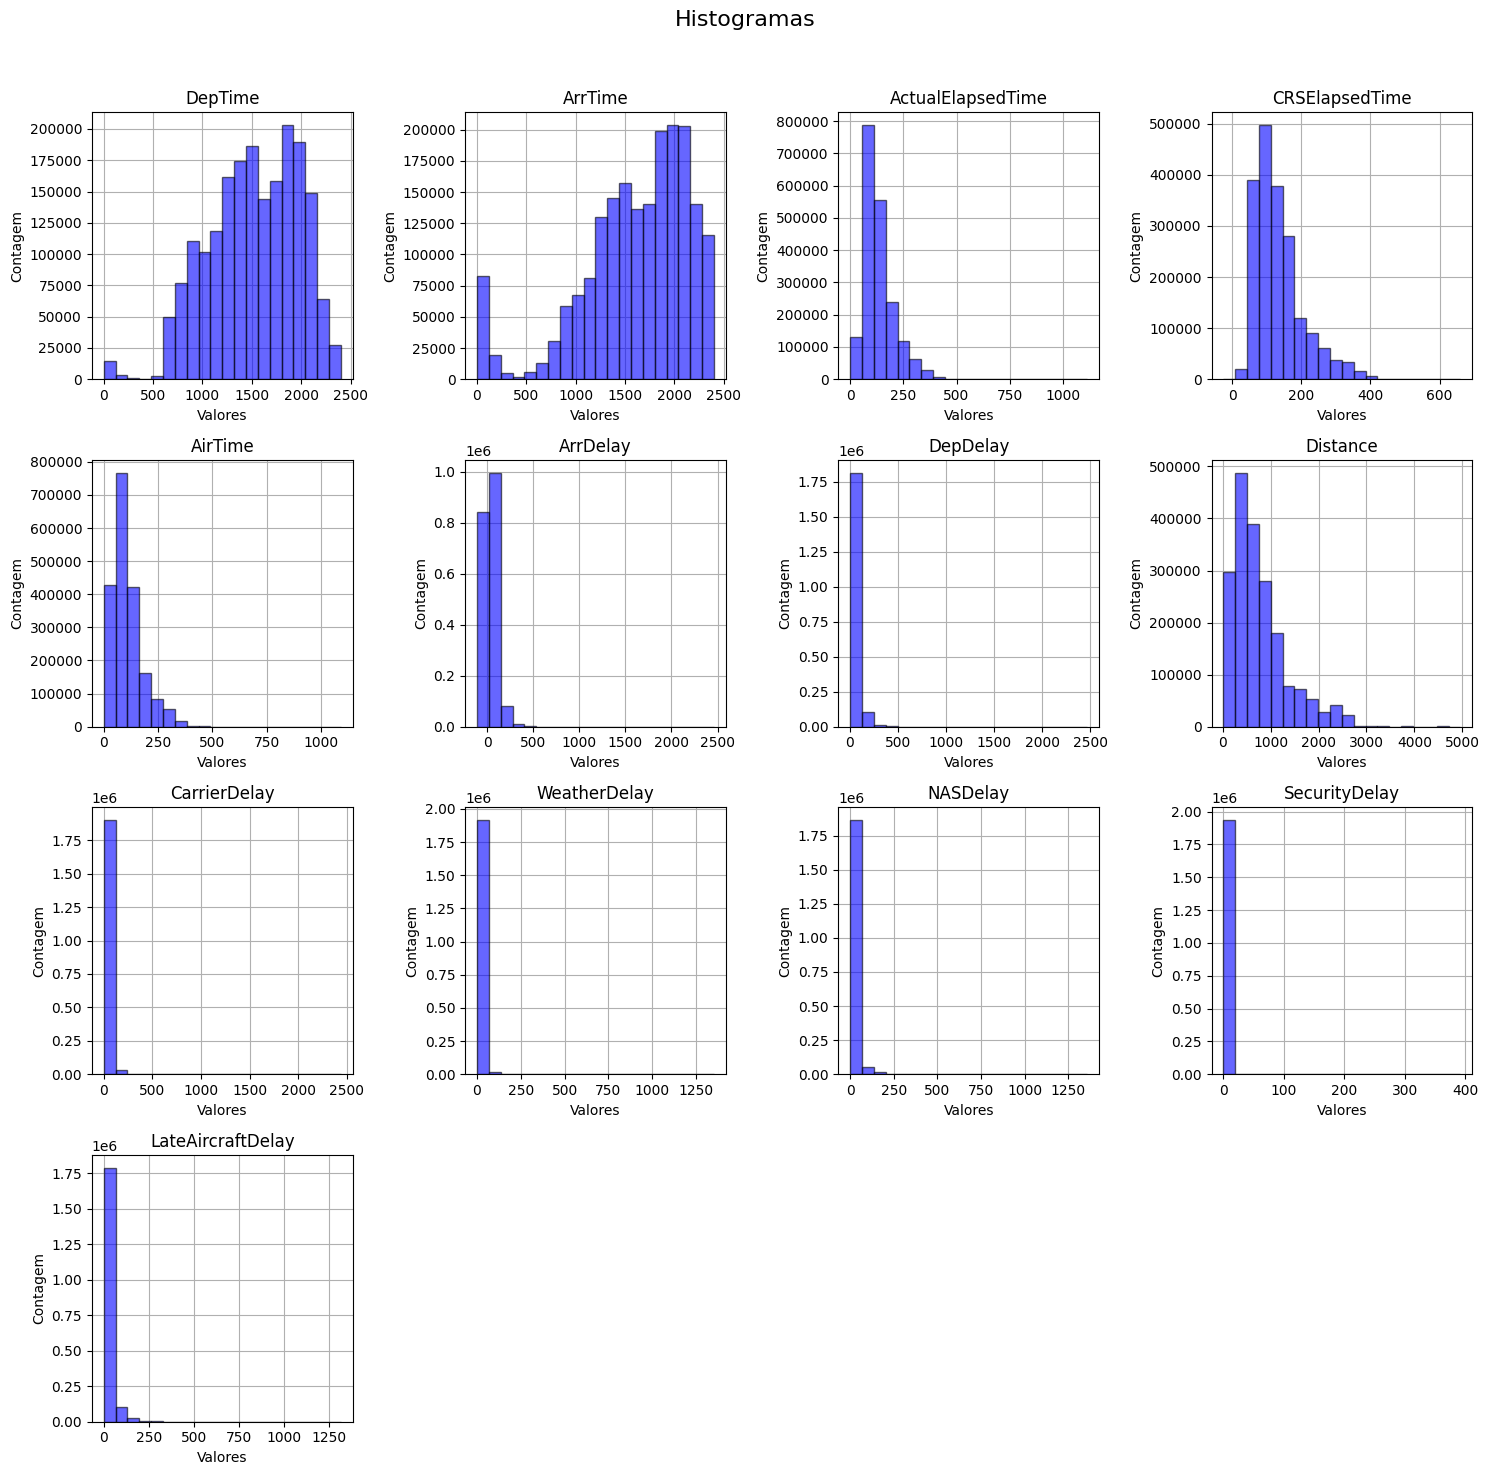

In [55]:

# Criação do grid de subgráficos 4x4
fig, axs = plt.subplots(4, 4, figsize=(15, 15))


for i, ax in zip(lista_var_continuas, axs.flatten()):
    df_continua[i].hist(bins=20, color='blue', edgecolor='black', alpha=0.6, ax=ax, zorder=4)
    ax.set_title(f'{i}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Contagem')

for i in [13, 14, 15]: # gambiarra para tirar os eixos dos lugares sem gráficos
    axs.flatten()[i].axis('off')

# Adiciona um título geral acima dos subgráficos
fig.suptitle('Histogramas', fontsize=16, zorder=1)  # Definindo zorder para o título geral

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

plt.show()

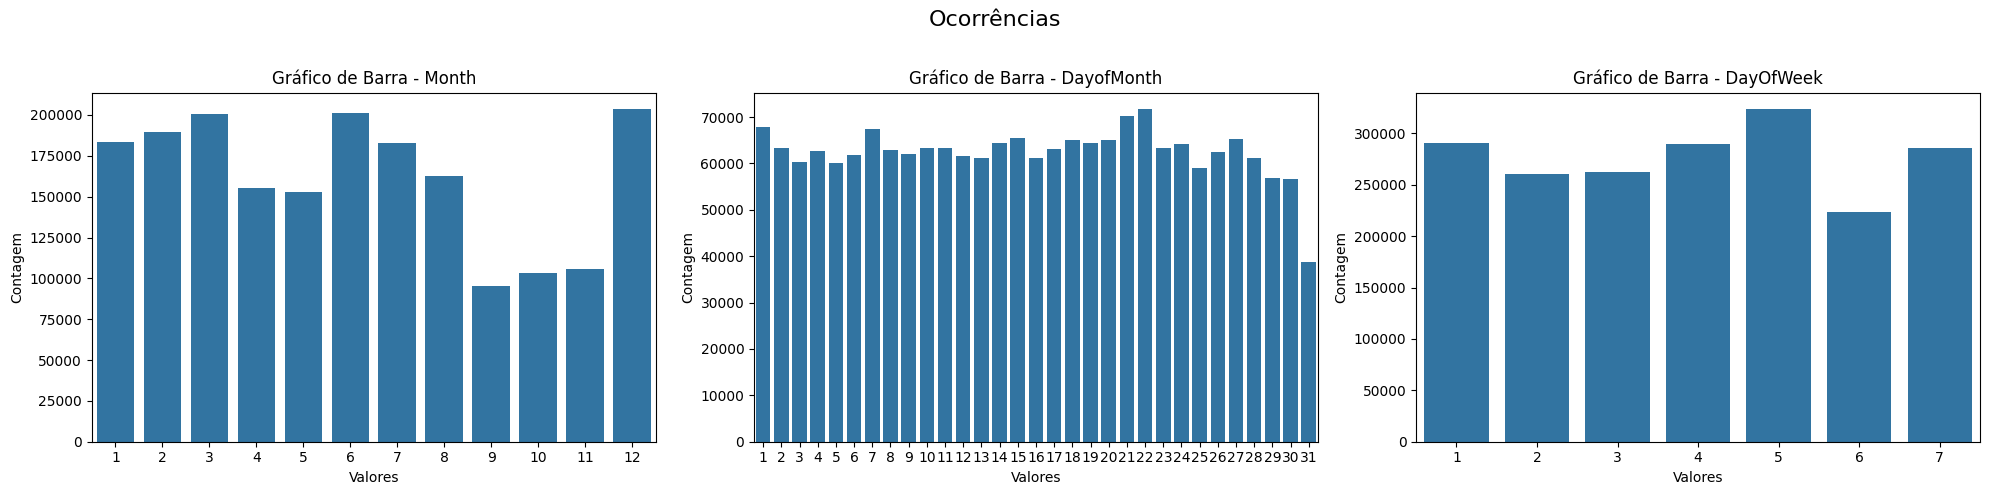

In [34]:
# Criar gráficos de barra para variáveis discretas
fig, axs =plt.subplots(1,3, figsize = (20,5))

for i, ax in zip(lista_var_discretas, axs.flatten()):
    sns.countplot(x=i, data=df_discreta[[i]], ax=ax)
    ax.set_title(f'Gráfico de Barra - {i}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Contagem')

# Adiciona um título geral acima dos subgráficos
fig.suptitle('Ocorrências', fontsize=16)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

# Exibe a figura
plt.show()

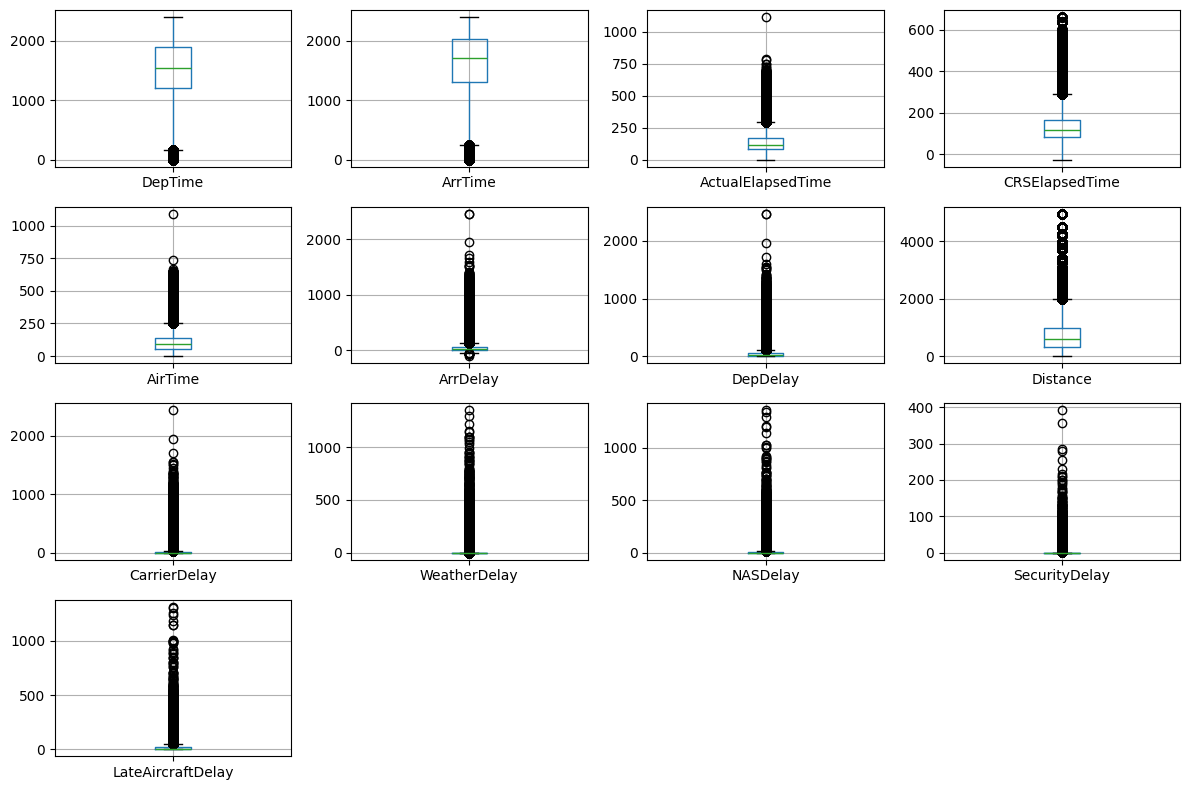

In [24]:
fig = plt.figure(figsize = (12,8))

for i, col in enumerate(df_continua):
    plt.subplot(4,4,i+1)
    df_continua.boxplot(col)
    plt.tight_layout()
    
plt.show()

Também acho que devemos tratar algumas variavéis. Excluir alguns outliers, como em ArrDelay, DepDelay, AirDelay. Podemos tratar aquelas com desvio mais alto. Excluir dados considerando os quartis.


In [ ]:
# Pensei em tratar apenas a coluna ArrDelay e DepDelay

In [18]:
quartis_personalizados = [0.90,0.95,0.96,0.97,0.98,0.99,1.00]
df['ArrDelay'].describe(percentiles=quartis_personalizados)

count    1.936758e+06
mean     4.201714e+01
std      5.672935e+01
min     -1.090000e+02
50%      2.400000e+01
90%      1.060000e+02
95%      1.480000e+02
96%      1.620000e+02
97%      1.800000e+02
98%      2.070000e+02
99%      2.550000e+02
100%     2.461000e+03
max      2.461000e+03
Name: ArrDelay, dtype: float64

In [19]:
colunas = ['ArrDelay', 'DepDelay']
percentis_98 = df[colunas].describe(percentiles=[0.98]).loc['98%']
df_s_outliers = df[(df[colunas] <= percentis_98).all(axis=1)]
df_s_outliers

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,0,N,0,0.0,0.0,0.0,0.0,0.0
1,1,3,4,754.0,735,1002.0,1000,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,0,N,0,0.0,0.0,0.0,0.0,0.0
2,1,3,4,628.0,620,804.0,750,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,0,N,0,0.0,0.0,0.0,0.0,0.0
3,1,3,4,1829.0,1755,1959.0,1925,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,0,N,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,0,N,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,1250.0,1220,1617.0,1552,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,12,13,6,657.0,600,904.0,749,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,12,13,6,1007.0,847,1149.0,1010,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,12,13,6,1251.0,1240,1446.0,1437,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,0,N,0,0.0,0.0,0.0,0.0,0.0


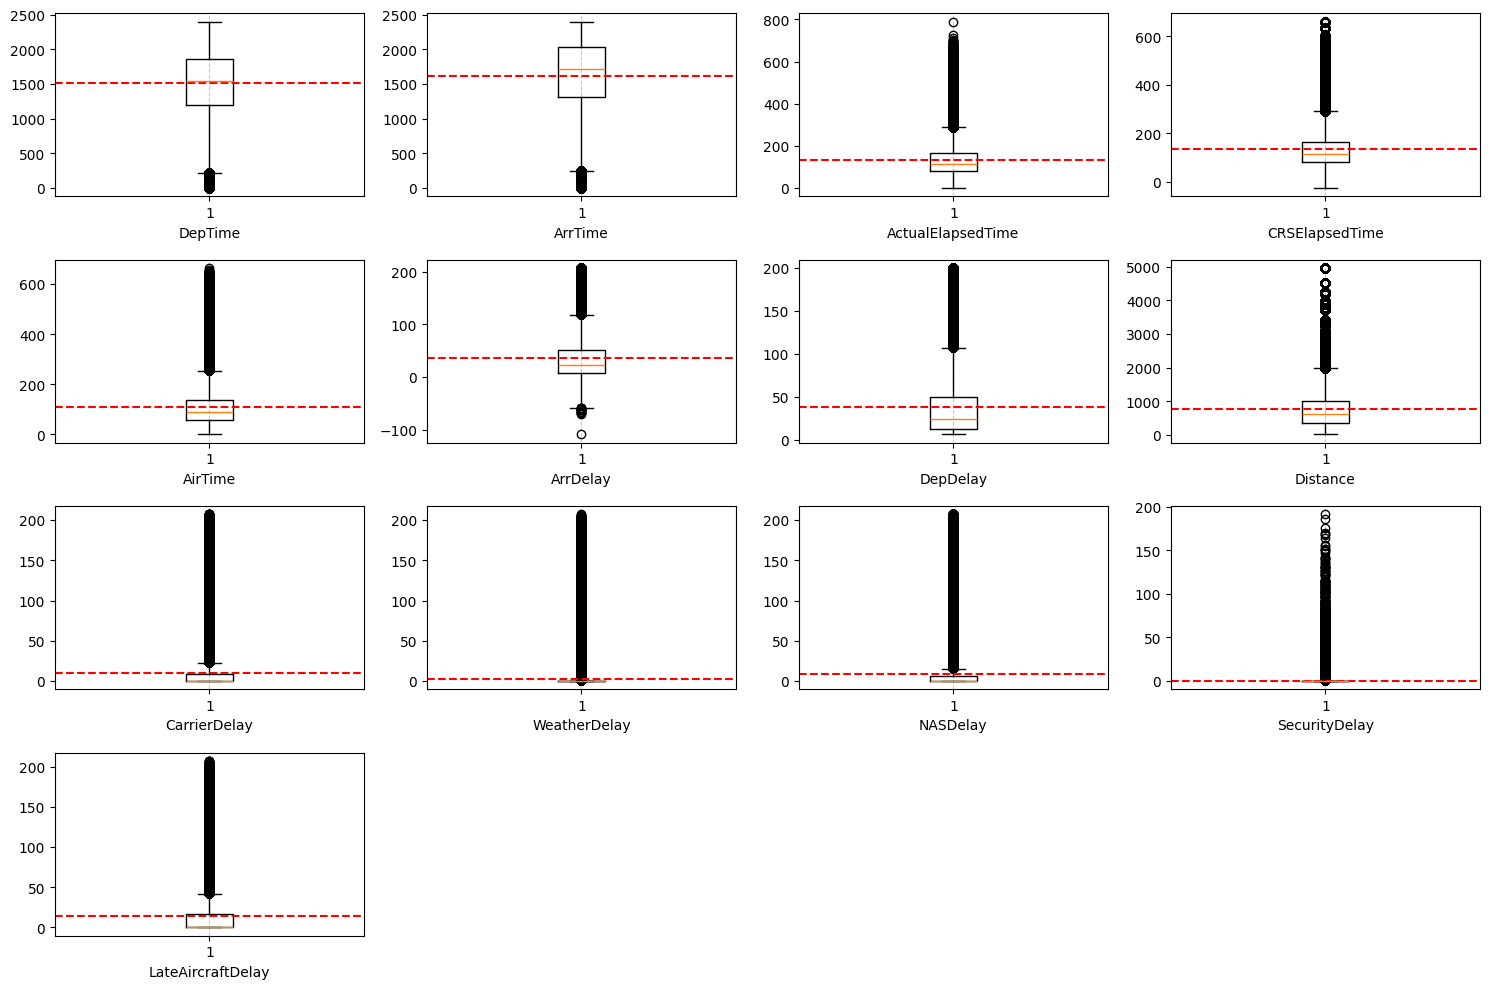

In [20]:
fig = plt.figure(figsize = (15,10))

for i, col in enumerate(df_continua):
    plt.subplot(4,4,i+1)
    plt.boxplot(df_s_outliers[col])
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.axhline(y=df_s_outliers[col].mean(), linestyle='--', color="red")
    
plt.tight_layout()     
plt.show()

In [18]:
# Não deu certo rodar tudo de uma vez no meu pc
#Avaliando as variáveis contínuas pelo mês e dia da semana
#for i in lista_var_continuas:
#    fig, ax = plt.subplots(1,2, figsize = ( 16,8))
#
#    sns.boxplot(x='Month', y=i, data=df, ax=ax[0])
#    sns.boxplot(x='DayOfWeek', y=i, data=df, ax=ax[1])
#
#    ax[0].set_title("Meses do Ano")
#    ax[1].set_title("Dias da Semana")
#    plt.show()


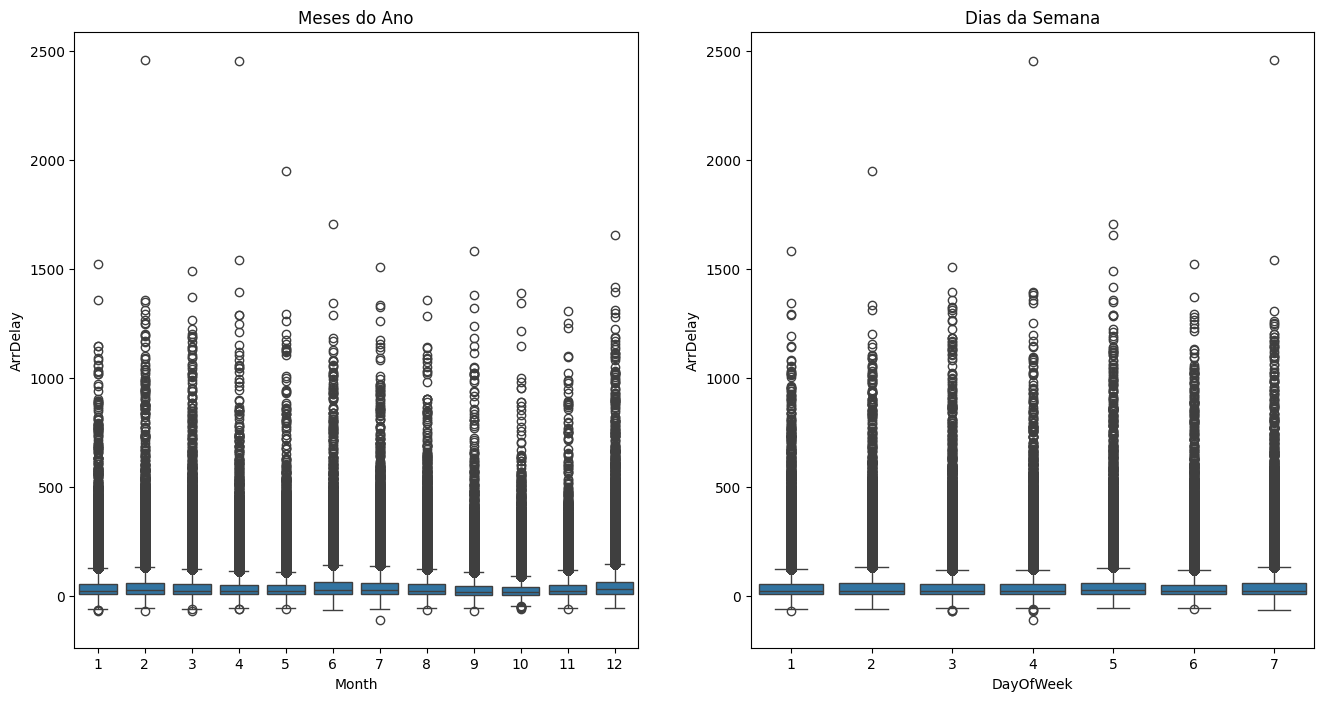

In [19]:
fig, ax = plt.subplots(1,2, figsize = ( 16,8))
#
sns.boxplot(x='Month', y='ArrDelay', data=df, ax=ax[0])
sns.boxplot(x='DayOfWeek', y='ArrDelay', data=df, ax=ax[1])
#
ax[0].set_title("Meses do Ano")
ax[1].set_title("Dias da Semana")
plt.show()

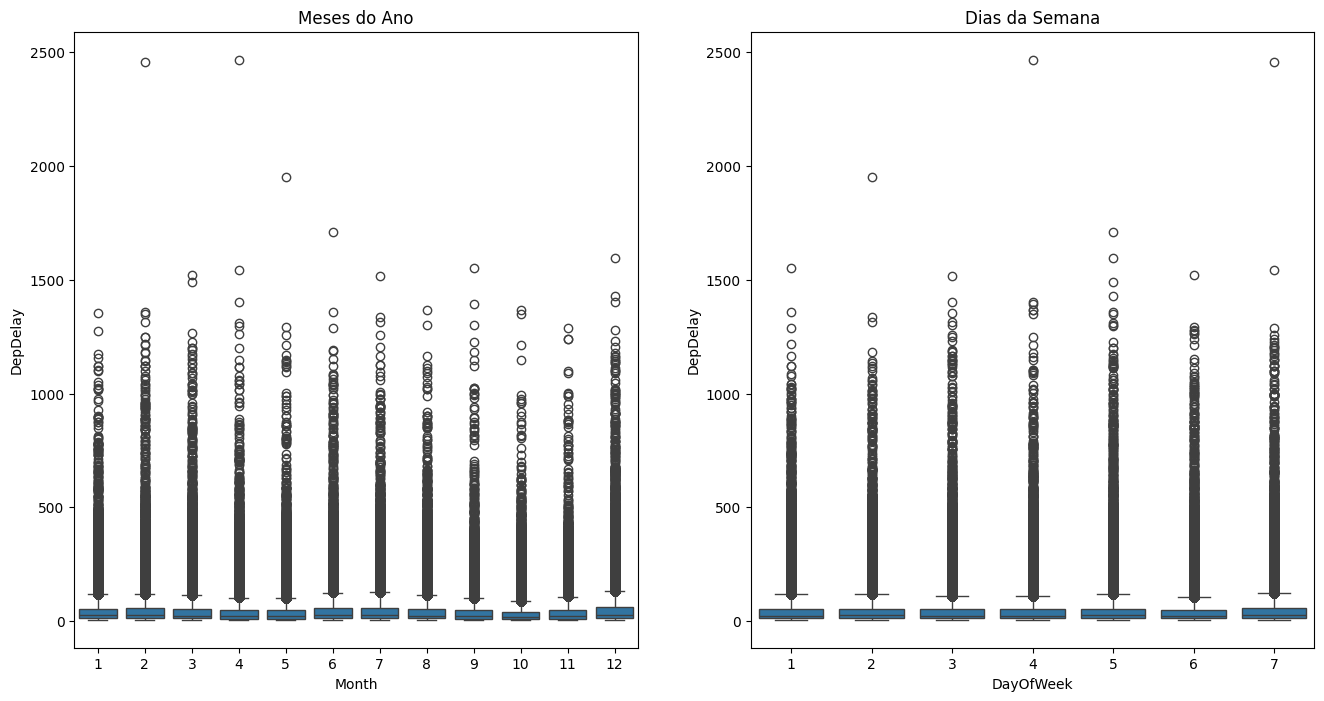

In [20]:
fig, ax = plt.subplots(1,2, figsize = ( 16,8))
#
sns.boxplot(x='Month', y='DepDelay', data=df, ax=ax[0])
sns.boxplot(x='DayOfWeek', y='DepDelay', data=df, ax=ax[1])
#
ax[0].set_title("Meses do Ano")
ax[1].set_title("Dias da Semana")
plt.show()

<BarContainer object of 1936758 artists>

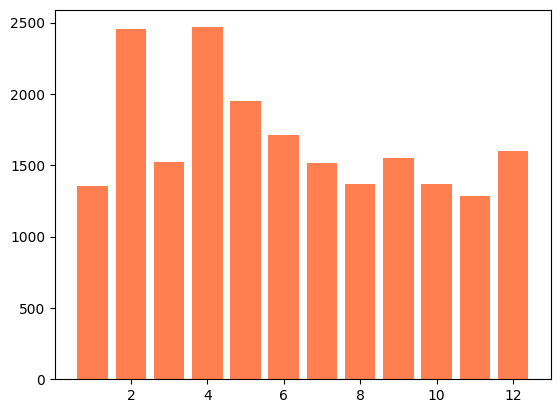

In [40]:
# Criar o gráfico de barras
# isso demorou 17 minutos para rodar!!!!!
plt.bar(df['Month'], df['DepDelay'], color='coral')

<BarContainer object of 1936758 artists>

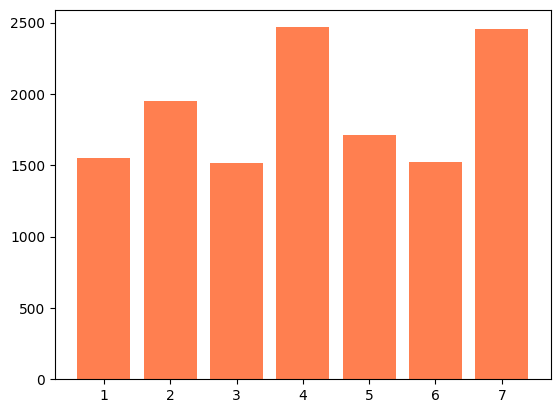

In [42]:
plt.bar(df['DayOfWeek'], df['DepDelay'], color='coral')

In [21]:
print(df_discreta['Month'].value_counts())


Month
12    203385
6     200914
3     200842
2     189534
1     183527
7     182945
8     162648
4     155264
5     153072
11    105563
10    103525
9      95539
Name: count, dtype: int64


In [22]:
print(df_discreta['DayofMonth'].value_counts())

DayofMonth
22    71649
21    70168
1     67815
7     67478
15    65587
27    65374
18    65132
20    65071
19    64470
14    64407
24    64202
10    63385
2     63339
11    63331
23    63320
17    63110
8     62979
4     62682
26    62549
9     62057
6     61814
12    61517
13    61278
16    61152
28    61093
3     60389
5     60000
25    59056
29    56893
30    56721
31    38740
Name: count, dtype: int64


In [23]:
print(df_discreta['DayOfWeek'].value_counts())

DayOfWeek
5    323259
1    290933
4    289451
7    286111
3    262805
2    260943
6    223256
Name: count, dtype: int64


In [147]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.corr()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,1.000000,0.059651,0.000088,-0.007809,-0.011367,0.001248,0.001367,0.000947,0.007157,-0.000608,-0.001585,0.004769,0.005498,0.028837,0.006467,-0.004159,0.003512,0.004422,-0.002948,-0.002194
DayofMonth,0.059651,1.000000,0.017476,0.001014,0.001019,0.000992,0.000758,-0.001165,0.000006,-0.000493,0.003996,0.005289,0.000117,0.004671,0.001190,-0.001829,0.000293,0.003287,-0.000362,0.005435
DayOfWeek,0.000088,0.017476,1.000000,0.021924,0.027039,0.010917,0.017750,0.003201,0.004978,0.004838,0.006166,0.008538,0.008138,0.000023,-0.001361,0.007105,0.004181,-0.005954,0.003653,0.005588
DepTime,-0.007809,0.001014,0.021924,1.000000,0.881598,0.451354,0.711513,-0.046126,-0.044581,-0.054018,0.126764,0.139254,-0.056003,0.002280,-0.004632,-0.010085,0.016579,0.048442,-0.009159,0.169744
CRSDepTime,-0.011367,0.001019,0.027039,0.881598,1.000000,0.391059,0.710303,-0.033534,-0.026343,-0.035401,0.044721,0.058875,-0.029517,0.000023,-0.009096,-0.066133,-0.000760,-0.008550,-0.011851,0.147540
ArrTime,0.001248,0.000992,0.010917,0.451354,0.391059,1.000000,0.608392,0.006546,-0.014966,-0.000369,-0.042054,-0.056677,-0.029767,-0.052192,-0.155640,-0.060790,-0.021948,0.034166,-0.005447,-0.019884
CRSArrTime,0.001367,0.000758,0.017750,0.711513,0.710303,0.608392,1.000000,0.032776,0.039822,0.025617,0.042888,0.053706,0.024335,0.000201,0.000907,-0.060757,0.001406,0.020631,-0.009240,0.116522
ActualElapsedTime,0.000947,-0.001165,0.003201,-0.046126,-0.033534,0.006546,0.032776,1.000000,0.957988,0.976798,0.073452,0.015062,0.940617,-0.033132,-0.116175,0.020222,0.008272,0.149760,0.005888,-0.009170
CRSElapsedTime,0.007157,0.000006,0.004978,-0.044581,-0.026343,-0.014966,0.039822,0.957988,1.000000,0.975077,-0.016546,0.006987,0.981626,-0.003912,0.021305,0.008012,-0.017688,0.023317,0.003507,-0.024608
AirTime,-0.000608,-0.000493,0.004838,-0.054018,-0.035401,-0.000369,0.025617,0.976798,0.975077,1.000000,0.004856,-0.005466,0.969926,-0.028308,-0.099259,0.013095,-0.015259,0.046289,0.005482,-0.019011


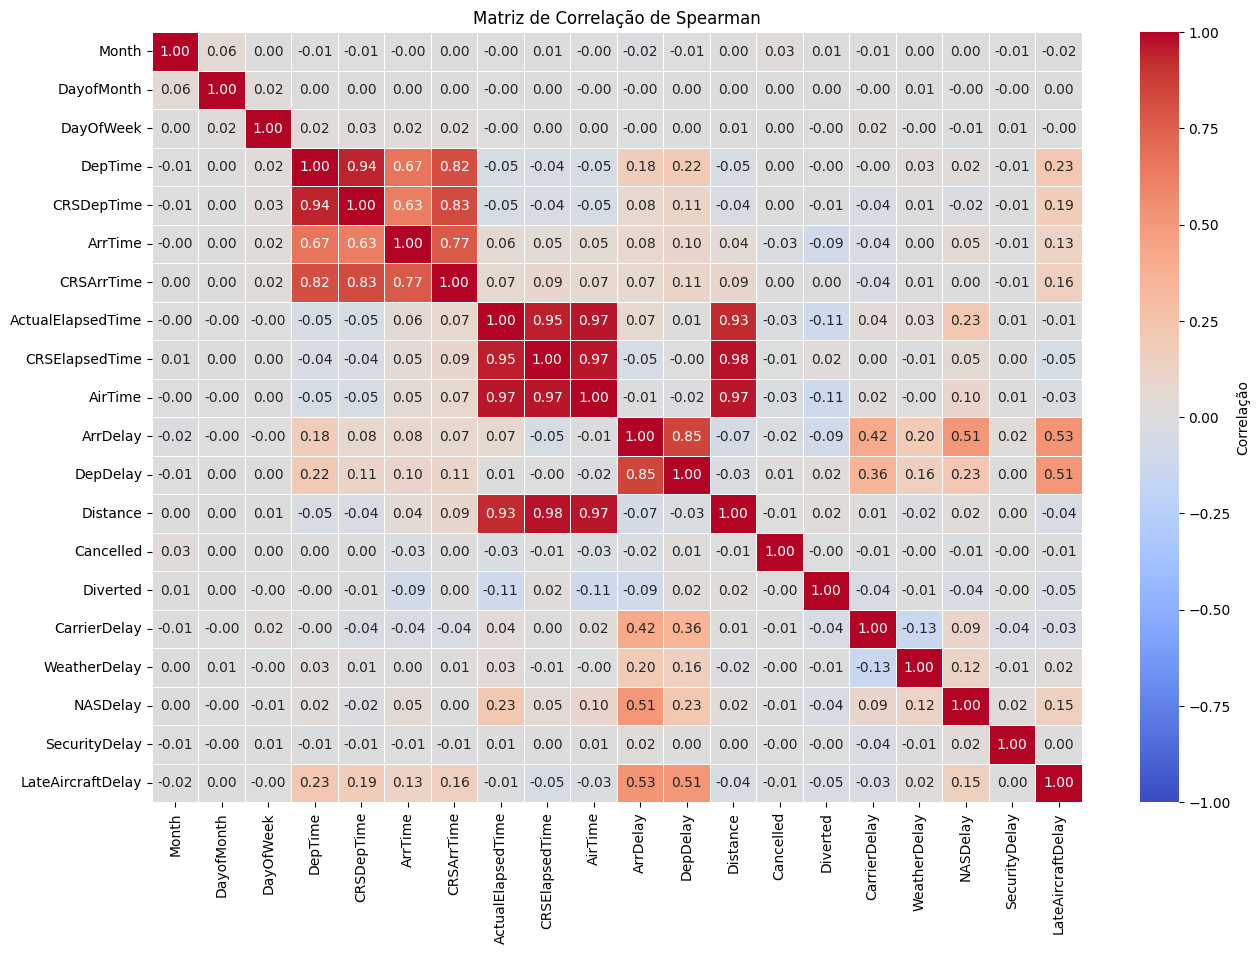

In [148]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df_num.corr(method="spearman")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Spearman")

# Exibindo o gráfico
plt.show()

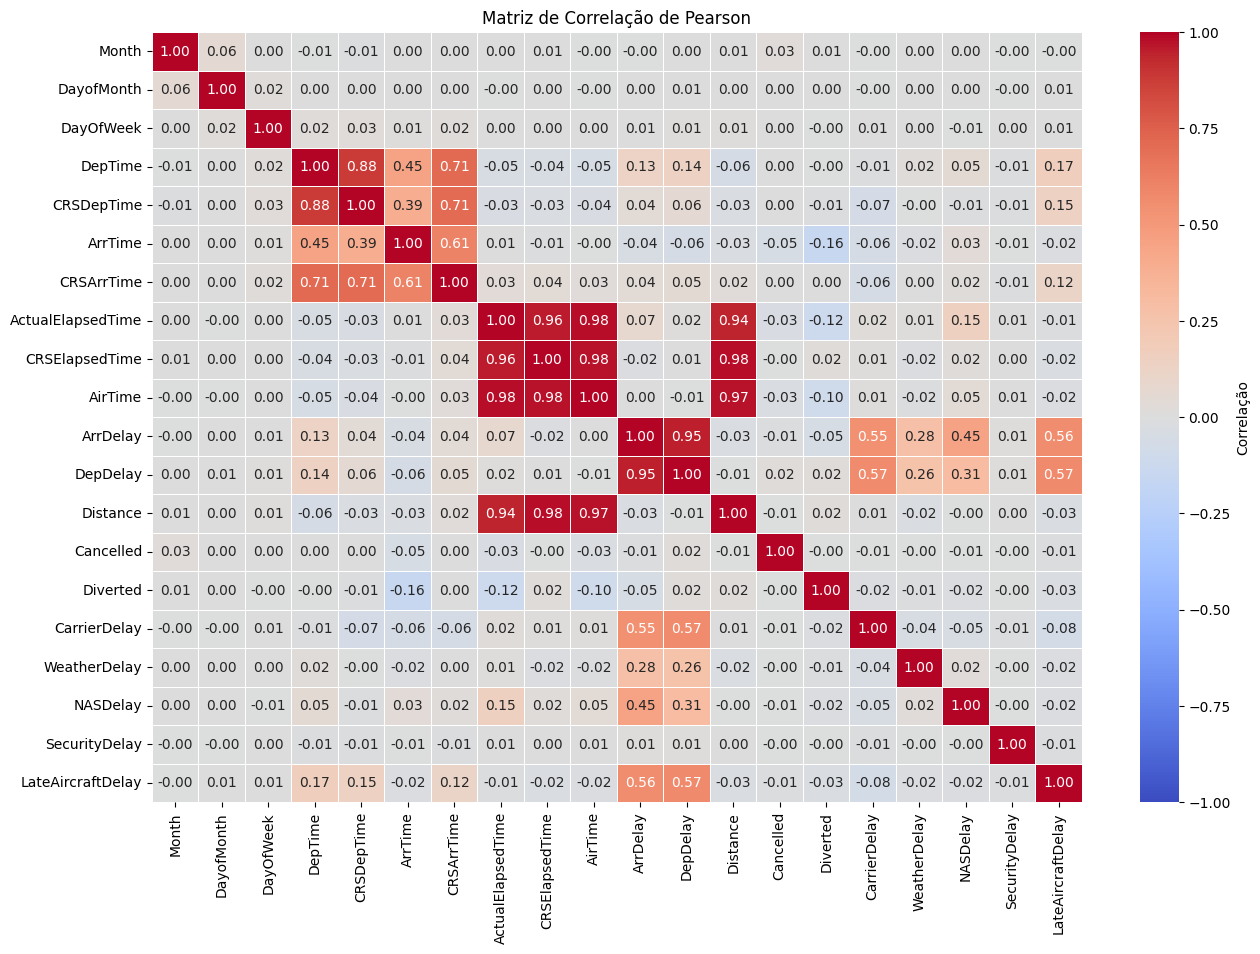

In [149]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df_num.corr(method="pearson")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Pearson")

# Exibindo o gráfico
plt.show()

In [32]:
# variáveis categóricas

[Text(0, 0, 'Transportadora'), Text(0, 1, 'Clima'), Text(0, 2, 'NCS')]

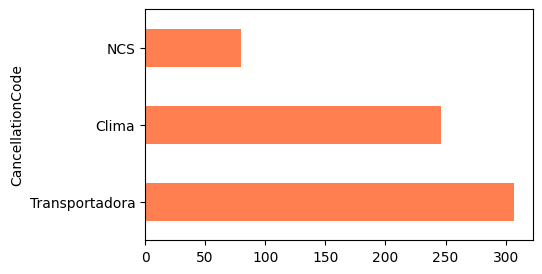

In [33]:
# gráfico para analisar qual o maior motivo para cancelamento de voo
voos_cancelados = df[df['Cancelled']==1]
legend_labels = {'A': 'Transportadora', 'B': 'Clima', 'C': 'NCS'}

plt.figure(figsize=(5, 3))
ax = voos_cancelados['CancellationCode'].value_counts().plot(kind='barh', color='coral')
ax.set_yticklabels([legend_labels[label] for label in voos_cancelados['CancellationCode'].unique()])


In [35]:
voos_cancelados['Dest'].value_counts()

Dest
ORD    73
ATL    26
EWR    21
SEA    16
ASE    15
       ..
PSC     1
PSP     1
FNT     1
ALB     1
OTZ     1
Name: count, Length: 164, dtype: int64

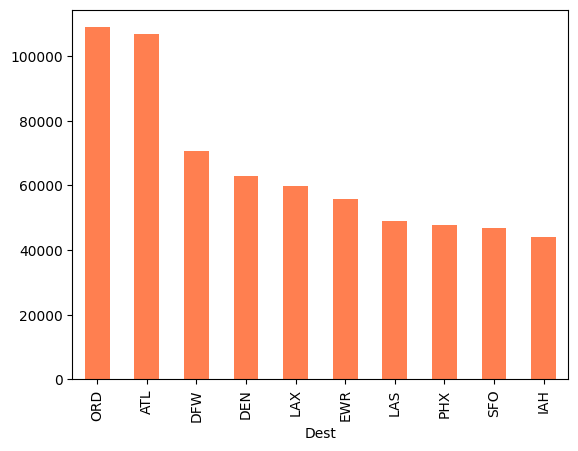

In [36]:
# Destino com mais registros
df['Dest'].value_counts().nlargest(10).plot(kind='bar', color='coral')
plt.show()

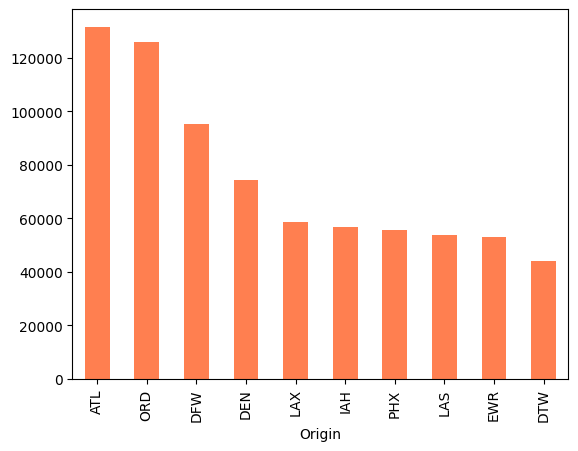

In [37]:
# Origem com mais registros
df['Origin'].value_counts().nlargest(10).plot(kind='bar', color='coral')
plt.show()

In [38]:
# Mais voos:
# Atlanta <-> Orlando

In [39]:
# Algumas sugestões:
# Analisar atrasos por semana ou mes
# Para onde são a maioria dos voos (ok)
# Tempo de voo 
# Pontualidade dos voos